# 1.&nbsp;Data Importing

In [87]:
# What are the 5 most danceable songs? 
# are different scores in danceability  significantly correlated with energy?

In [ ]:
# import packages
import pandas as pd
import numpy as np

In [19]:
# import dataset: connect to the google drive
from google.colab import drive
drive.mount("/content/drive")
data = pd.read_csv('drive/MyDrive/data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2.&nbsp;Data Cleaning (overview)

In [ ]:
# danceability: a value of 0.0 is least danceable and 1.0 is most danceable
# energy: measure from 0.0 to 1.0

In [32]:
print(data)

      acousticness  danceability  duration_ms  energy  instrumentalness  key  \
0          0.01020         0.833       204600   0.434          0.021900    2   
1          0.19900         0.743       326933   0.359          0.006110    1   
2          0.03440         0.838       185707   0.412          0.000234    2   
3          0.60400         0.494       199413   0.338          0.510000    5   
4          0.18000         0.678       392893   0.561          0.512000    5   
...            ...           ...          ...     ...               ...  ...   
2012       0.00106         0.584       274404   0.932          0.002690    1   
2013       0.08770         0.894       182182   0.892          0.001670    1   
2014       0.00857         0.637       207200   0.935          0.003990    0   
2015       0.00164         0.557       185600   0.992          0.677000    1   
2016       0.00281         0.446       204520   0.915          0.000039    9   

      liveness  loudness  mode  speechi

In [22]:
print(data.shape)

(2017, 17)


In [23]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In [ ]:
print(data.describe())

        Unnamed: 0  acousticness  danceability   duration_ms       energy  \
count  2017.000000   2017.000000   2017.000000  2.017000e+03  2017.000000   
mean   1008.000000      0.187590      0.618422  2.463062e+05     0.681577   
std     582.402066      0.259989      0.161029  8.198181e+04     0.210273   
min       0.000000      0.000003      0.122000  1.604200e+04     0.014800   
25%     504.000000      0.009630      0.514000  2.000150e+05     0.563000   
50%    1008.000000      0.063300      0.631000  2.292610e+05     0.715000   
75%    1512.000000      0.265000      0.738000  2.703330e+05     0.846000   
max    2016.000000      0.995000      0.984000  1.004627e+06     0.998000   

       instrumentalness          key     liveness     loudness         mode  \
count       2017.000000  2017.000000  2017.000000  2017.000000  2017.000000   
mean           0.133286     5.342588     0.190844    -7.085624     0.612295   
std            0.273162     3.648240     0.155453     3.761684     0.

In [24]:
print(data['danceability'].value_counts())
print("============================")
print(data['energy'].value_counts())

0.683    12
0.760    11
0.704    11
0.646    10
0.614    10
         ..
0.334     1
0.860     1
0.363     1
0.643     1
0.904     1
Name: danceability, Length: 632, dtype: int64
0.857    10
0.657     9
0.860     9
0.770     9
0.793     9
         ..
0.618     1
0.726     1
0.317     1
0.994     1
0.932     1
Name: energy, Length: 719, dtype: int64


In [35]:
data.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

# 3.&nbsp;Data Cleaning (interpretability)

# 4.&nbsp;Data Cleaning (reduction)

In [36]:
# here i've managed to remove the column i wanted to remove, but when i refreshed again there was error.
# but it worked in the end, becaus from now on there's no column "unnamned 0"

data.drop("Unnamed: 0",axis=1,inplace=True)

KeyError: ignored

In [37]:
data.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


# 7.&nbsp;Data Exploring


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   duration_ms       2017 non-null   int64  
 3   energy            2017 non-null   float64
 4   instrumentalness  2017 non-null   float64
 5   key               2017 non-null   int64  
 6   liveness          2017 non-null   float64
 7   loudness          2017 non-null   float64
 8   mode              2017 non-null   int64  
 9   speechiness       2017 non-null   float64
 10  tempo             2017 non-null   float64
 11  time_signature    2017 non-null   float64
 12  valence           2017 non-null   float64
 13  target            2017 non-null   int64  
 14  song_title        2017 non-null   object 
 15  artist            2017 non-null   object 
dtypes: float64(10), int64(4), object(2)
memory

In [42]:
# What are the 5 most danceable songs?
top_artists_danceable_songs = data[["danceability","song_title","artist"]].sort_values(by="danceability",ascending=False)[:5]
top_artists_danceable_songs

,danceability,song_title,artist
1433,0.984,Flashwind - Radio Edit,Ben Remember
1901,0.967,SexyBack,Justin Timberlake
604,0.962,Check Me Out Like,Blaqstarr
32,0.959,Best Friend,Young Thug
1957,0.959,Ice Ice Baby,Vanilla Ice


# 8.&nbsp;Data Analysis

In [43]:
data.corr()

<ipython-input-43-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
acousticness,1.000000,-0.179894,0.071536,-0.646319,0.144397,-0.081037,-0.117126,-0.562021,0.068028,-0.099893,-0.127596,-0.190353,-0.152227,-0.129627
danceability,-0.179894,1.000000,0.004695,0.038557,-0.130561,0.022325,-0.132044,0.104362,-0.047867,0.142661,-0.143538,0.128909,0.442061,0.176706
duration_ms,0.071536,0.004695,1.000000,-0.144473,0.305403,0.023570,0.023203,-0.273798,-0.074806,-0.079562,-0.076469,-0.040157,-0.120030,0.146749
energy,-0.646319,0.038557,-0.144473,1.000000,-0.122890,0.072886,0.217435,0.762177,-0.070263,0.093102,0.165721,0.182895,0.278383,0.039688
instrumentalness,0.144397,-0.130561,0.305403,-0.122890,1.000000,-0.009640,0.001063,-0.354625,-0.030099,-0.155349,0.000347,-0.070721,-0.194630,0.152594
key,-0.081037,0.022325,0.023570,0.072886,-0.009640,1.000000,0.049739,0.050929,-0.195040,0.019116,0.040301,0.024937,0.032485,0.033594
liveness,-0.117126,-0.132044,0.023203,0.217435,0.001063,0.049739,1.000000,0.156648,-0.018587,0.092403,0.010558,0.018199,-0.053011,0.026364
loudness,-0.562021,0.104362,-0.273798,0.762177,-0.354625,0.050929,0.156648,1.000000,-0.044015,0.088844,0.156418,0.143011,0.204968,-0.072000
mode,0.068028,-0.047867,-0.074806,-0.070263,-0.030099,-0.195040,-0.018587,-0.044015,1.000000,-0.049398,-0.059995,-0.039038,-0.032879,-0.072336
speechiness,-0.099893,0.142661,-0.079562,0.093102,-0.155349,0.019116,0.092403,0.088844,-0.049398,1.000000,0.111359,0.113529,0.054419,0.154006


In [ ]:
# danceability and energy show a 0.038 correlation.

In [84]:
data_group1 = np.array(["danceability"])
data_group2 = np.array(["energy"])                    

In [86]:
import scipy.stats as stats
def get_ttest(x,y):
  result = stats.ttest_ind(a=x, b=y, equal_var=True)
  return result

get_ttest(x,y)  
#the correlation between the 2 variables is extremely significant (danceability & energy)

Ttest_indResult(statistic=-10.709364686652343, pvalue=2.077024916134981e-26)

# 9.&nbsp;Data Visualization

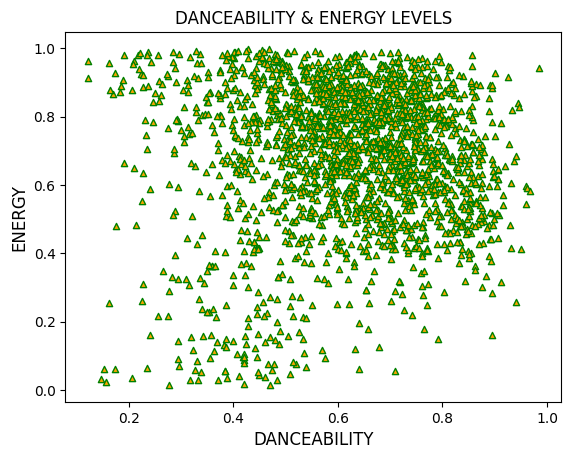

In [68]:

# this graph show what we found in data analysis (i.e. if different scores in danceability are significantly correlated with energy)

x = data["danceability"]
y = data["energy"]

plt.scatter(x, y, c = "orange", linewidths = 1, marker = "^", edgecolor = "green", s = 20)

plt.xlabel("DANCEABILITY",fontsize=12)
plt.ylabel("ENERGY",fontsize=12)
plt.title("DANCEABILITY & ENERGY LEVELS",fontsize=12)
plt.show()

# there is not a linear correlation between the two indexes

Text(0.5, 1.0, 'DANCEABLE ON THE TOP 5 SONGS')

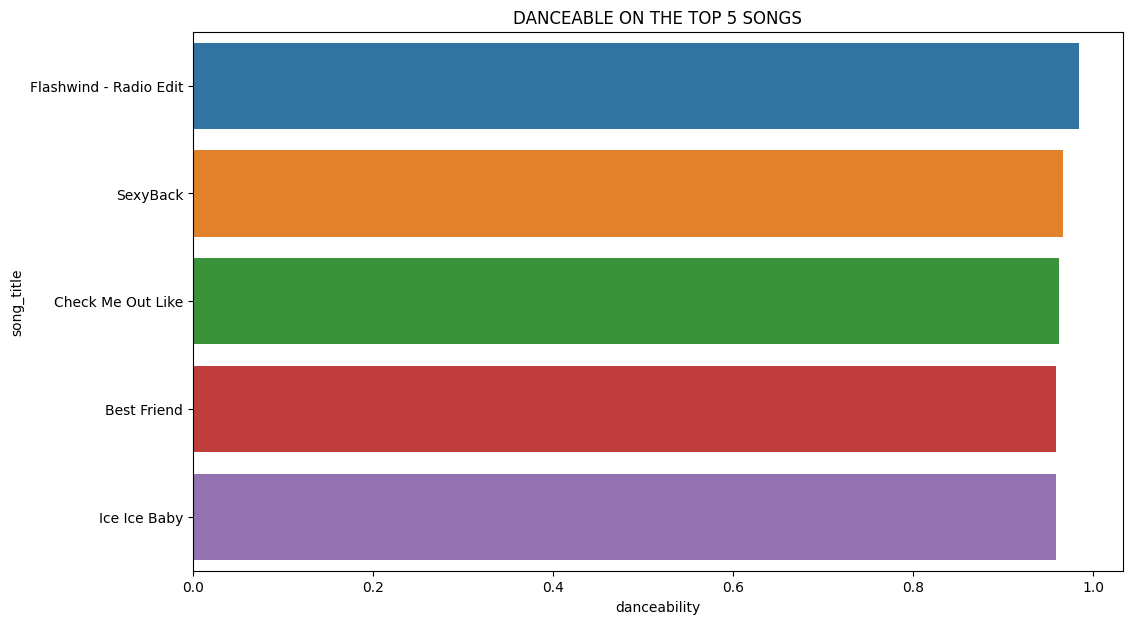

In [89]:
# graph of the top 5 songs accoridng to their danceability.
import seaborn as sns

plt.figure(figsize=(12,7))
sns.barplot(x="danceability", y="song_title", data =top_artists_danceable_songs)
plt.title("DANCEABLE ON THE TOP 5 SONGS")

#as you can see all of them are high in "danceability", which suggests that a popular song needs a high danceability feature. 

# 10.&nbsp;Data Exporting

In [92]:
data.to_csv('cleaned_examdata.csv', header = False, index=False)